In [231]:
import os
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
os.chdir('/Users/1zuu/Desktop/Desktop - Isuru’s Mac mini/ML Research/MLOps Projects/MLOps iNeuron Course/MLOps-01-Churn-Analysis')
pd.set_option('display.max_columns', None)

In [232]:
df_churn = pd.read_csv(
                    'data/telco-churn-analysis.csv',
                    # sep=','
                    )
del df_churn['customerID']
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [233]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [234]:
# check null distribution
df_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [235]:
"""
This sometimes leads to incorrect data types being assigned to columns.

cat_columns = df_churn.columns[df_churn.dtypes=="object"]
num_columns = df_churn.columns[df_churn.dtypes!="object"]
"""

num_columns = [
                'tenure', 
                'SeniorCitizen', 
                'MonthlyCharges', 
                'TotalCharges'
                ]

cat_columns = df_churn.columns.difference(num_columns)

In [236]:
# Fix the issue in TotalCharges column
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(0)
df_churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [237]:
for col in cat_columns:
    print(df_churn[col].value_counts())
    print(f"here is the total count:{len(df_churn[col].value_counts())}")
    print("=======================")

Churn
No     5174
Yes    1869
Name: count, dtype: int64
here is the total count:2
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
here is the total count:3
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
here is the total count:2
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
here is the total count:3
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
here is the total count:3
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
here is the total count:3
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
here is the total count:3
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
here 

In [238]:
for col in num_columns:
    print(col)
    col_num = df_churn[col].astype(float)
    print(col_num.describe())
    print("=======================")

tenure
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
MonthlyCharges
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
TotalCharges
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


<Axes: >

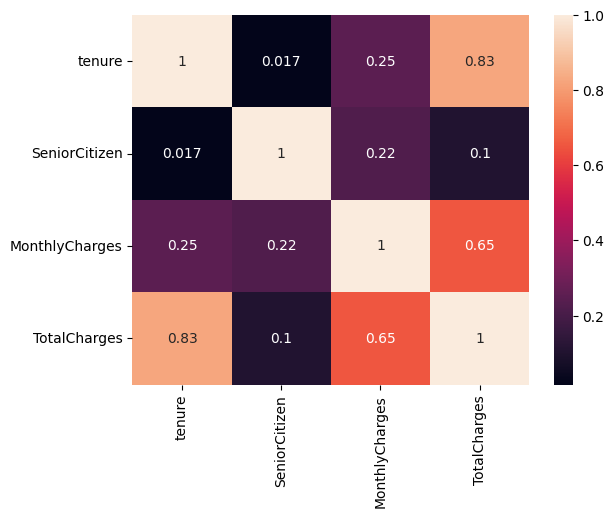

In [239]:
sns.heatmap(df_churn[num_columns].corr(),annot=True)

In [240]:
def encode_cat_vars(
                    df, 
                    cat_vars
                    ):
    le_dict = defaultdict(LabelEncoder)
    df[cat_vars] = df[cat_vars].apply(lambda x: le_dict[x.name].fit_transform(x))
    return df

def scale_num_vars(X, Y):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    scaler.fit(Xtrain)

    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    return Xtrain, Xtest, Ytrain, Ytest

def preprocessor(
                df, 
                cat_vars
                ):
    df = encode_cat_vars(df, cat_vars)
    Y = df['Churn'].values
    X = df.drop(columns=['Churn']).values
    Xtrain, Xtest, Ytrain, Ytest = scale_num_vars(X, Y)
    return Xtrain, Xtest, Ytrain, Ytest

In [241]:
Xtrain, Xtest, Ytrain, Ytest= preprocessor(df_churn, cat_columns)
print(f"Xtrain shape: {Xtrain.shape}")
print(f"Xtest shape: {Xtest.shape}")
print(f"Ytrain shape: {Ytrain.shape}")
print(f"Ytest shape: {Ytest.shape}")

Xtrain shape: (5634, 19)
Xtest shape: (1409, 19)
Ytrain shape: (5634,)
Ytest shape: (1409,)


In [242]:
model_dict = {
            'SVM': SVC(),
            'RFC': RandomForestClassifier(),
            'KNN': KNeighborsClassifier(),
            'XGB': XGBClassifier()
            }

In [243]:
def plot_confusion_matrix(
                        Xtest, 
                        Ytest,
                        model_fit_dict
                        ):
    pred_dict = {}
    for model_name, model in model_fit_dict.items():
        pred = model.predict(Xtest)
        pred_dict[model_name] = pred

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    for i, (model_name, model_pred) in enumerate(pred_dict.items()):
        sns.heatmap(
                    confusion_matrix(Ytest, model_pred),
                    annot=True,
                    ax=ax[i//2, i%2]
                    )
        ax[i//2, i%2].set_title(f"{model_name} - Confusion Matrix")
    plt.show()

def write_classification_report(
                                Xtest, 
                                Ytest,
                                model_fit_dict
                                ):
    classification_report_str = ""
    for model_name, model in model_fit_dict.items():
        pred = model.predict(Xtest)
        classification_report_str += f"-----------  Classification Report for {model_name} -----------\n"
        classification_report_str += classification_report(Ytest, pred)
        classification_report_str += "=====================================================\n"

    return classification_report_str

In [244]:
model_fit_dict = {}
for model_name, model in model_dict.items():
    model.fit(Xtrain, Ytrain)
    model_fit_dict[model_name] = model

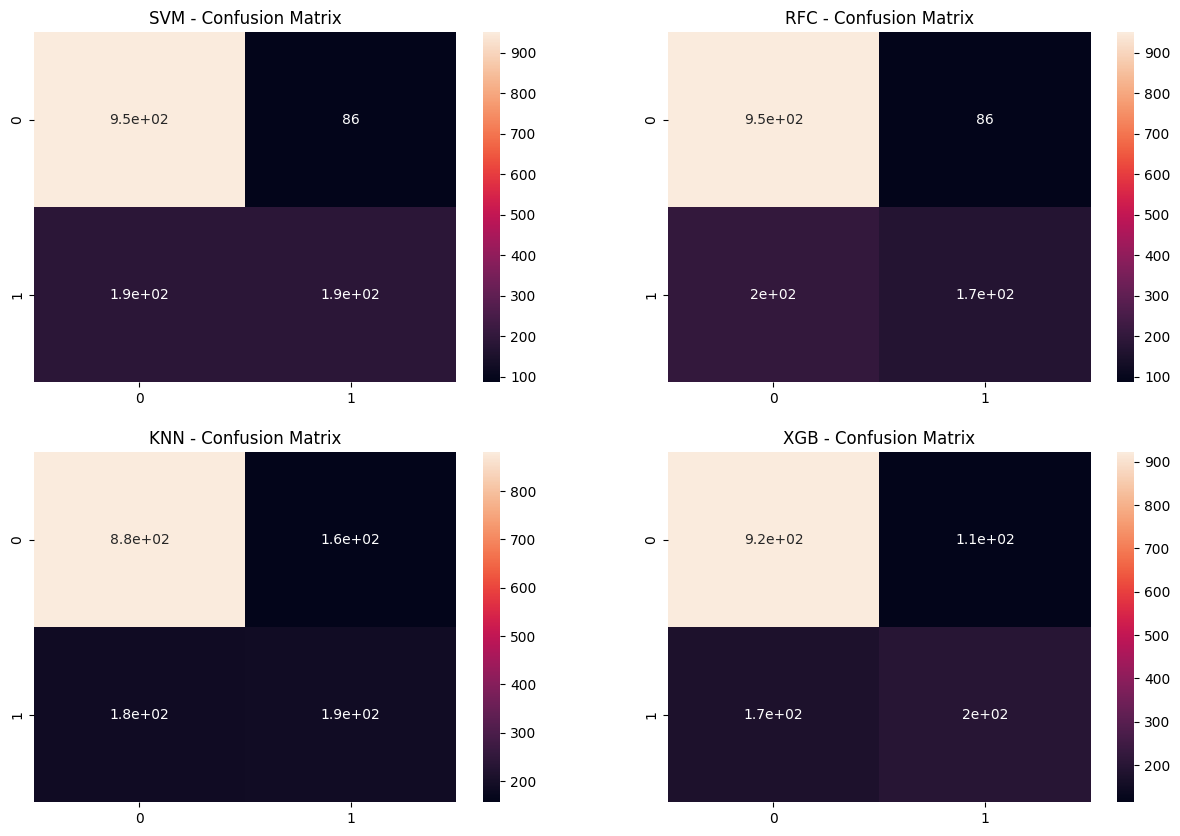

In [245]:
plot_confusion_matrix(Xtest, Ytest, model_fit_dict)

In [246]:
classification_report_str = write_classification_report(Xtest, Ytest, model_fit_dict)
print(classification_report_str)

-----------  Classification Report for SVM -----------
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409
-----------  Classification Report for RFC -----------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409
-----------  Classification Report for KNN -----------
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.50      0.52       373

    accuracy       